# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [8]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from ipywidgets import interact, FloatSlider
import sympy as sp
from scipy.optimize import minimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

A New Keynesian model is a framework used in macroeconomics to analyze the effects of various economic shocks on key macroeconomic variables such as output, inflation, and interest rates. It combines elements of Keynesian economics with modern macroeconomic theory. A typical New Keynesian model consists of three main equations:

IS Curve:
$$
y_t = E_t[y_{t+1}] - 1/σ * (E_t[r_t] - ρ) 
$$
Phillips Curve:
$$
π_t = κy_t + βE_t[π_{t+1}]
$$
Taylor Rule:
$$
r_t = ρ + ϕ_yE_t[y_{t+1}] + ϕ_πE_t[π_{t+1}] 
$$

The IS Curve represents the aggregate demand equation which shows the relationship between output, expected future output, the real interest rate. It reflects how changes in interest rates and expectations about future output affect current output. The Phillips Curve is the inflation equation, which represents the relationship between inflation, the output gap and eexpected future inflation. It describes how deviations of actual output from potential output influence inflation. Taylor Rule or the Monetary Policy Rule represents the central bank's reaction function, where the nominal interest rate is set based on deviations of output from potential output and inflation from target inflation.

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

In [21]:
# Define the model equations
# IS curve
def y_t(Exp_y_t1, sigma, Exp_r_t, rho):
    return Exp_y_t1 - (1/sigma)*(Exp_r_t-rho)

# Phillips curve
def pi_t(kappa, y_t, beta, Exp_pi_t1):
    return kappa*y_t + beta* Exp_pi_t1

# Taylor rule
def r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1):
    return rho + phi_y * Exp_y_t1 + phi_pi * Exp_pi_t1

# Solve the model equations
def solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi):
    # Define a function to solve using fsolve
    def equations(vars):
        yt, pi_t1, rt1 = vars
        eq1 = y_t(Exp_y_t1, sigma, rt1, rho) - yt
        eq2 = pi_t(kappa, yt, beta, Exp_pi_t1) - pi_t1
        eq3 = r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1) - rt1
        return [eq1, eq2, eq3]
    
    # Initial guess
    guess = [0, 0, 0]
    
    # Solve using fsolve
    yt, pi_t1, rt1 = fsolve(equations, guess)
    
    return yt, pi_t1, rt1

# Simulation
def simulate_model(periods, Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi):
    y_t_values = [0]  # Initial output assumed to be 0
    pi_t_values = [0]  # Initial inflation assumed to be 0
    r_t_values = [0]  # Initial interest rate assumed to be 0
    for _ in range(int(periods)):  # Convert periods to integer
        yt, pi_t1, rt1 = solve_model(Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi)
        y_t_values.append(yt)
        pi_t_values.append(pi_t1)
        r_t_values.append(rt1)
        # Update expected values for the next period
        Exp_y_t1, Exp_r_t, Exp_pi_t1 = yt, rt1, pi_t1
    return y_t_values, pi_t_values, r_t_values

# Interactive plot function
def interactive_plot(periods, Exp_y_t1_val, Exp_r_t_val, Exp_pi_t1_val, sigma_val, rho_val, kappa_val, beta_val, phi_y_val, phi_pi_val):
    y_t_values, pi_t_values, r_t_values = simulate_model(periods, Exp_y_t1_val, Exp_r_t_val, Exp_pi_t1_val, sigma_val, rho_val, kappa_val, beta_val, phi_y_val, phi_pi_val)
    
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(y_t_values)
    plt.title('Output (y_t)')
    plt.xlabel('Period')
    plt.ylabel('Output')

    plt.subplot(3, 1, 2)
    plt.plot(pi_t_values)
    plt.title('Inflation (π_t)')
    plt.xlabel('Period')
    plt.ylabel('Inflation')

    plt.subplot(3, 1, 3)
    plt.plot(r_t_values)
    plt.title('Interest Rate (r_t)')
    plt.xlabel('Period')
    plt.ylabel('Interest Rate')

    plt.tight_layout()
    plt.show()

# Set up the interactive widget
interact(interactive_plot,
         periods=FloatSlider(min=1, max=100, step=1, value=50, description='Periods'),
         Exp_y_t1_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_y_t1'),
         Exp_r_t_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_r_t'),
         Exp_pi_t1_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='Exp_pi_t1'),
         sigma_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='sigma'),
         rho_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='rho'),
         kappa_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='kappa'),
         beta_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='beta'),
         phi_y_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='phi_y'),
         phi_pi_val=FloatSlider(min=0, max=1, step=0.1, value=0.5, description='phi_pi')
        );


interactive(children=(FloatSlider(value=50.0, description='Periods', min=1.0, step=1.0), FloatSlider(value=0.5…

## Analytical solution

From the values ploted before, we will solve the model by choosing random values.

Here, we wanted first to solve the model as it is, so we wrote some code in order to find the optimal values for each variables we have defined above, except for "periods" which will be set as 100.  

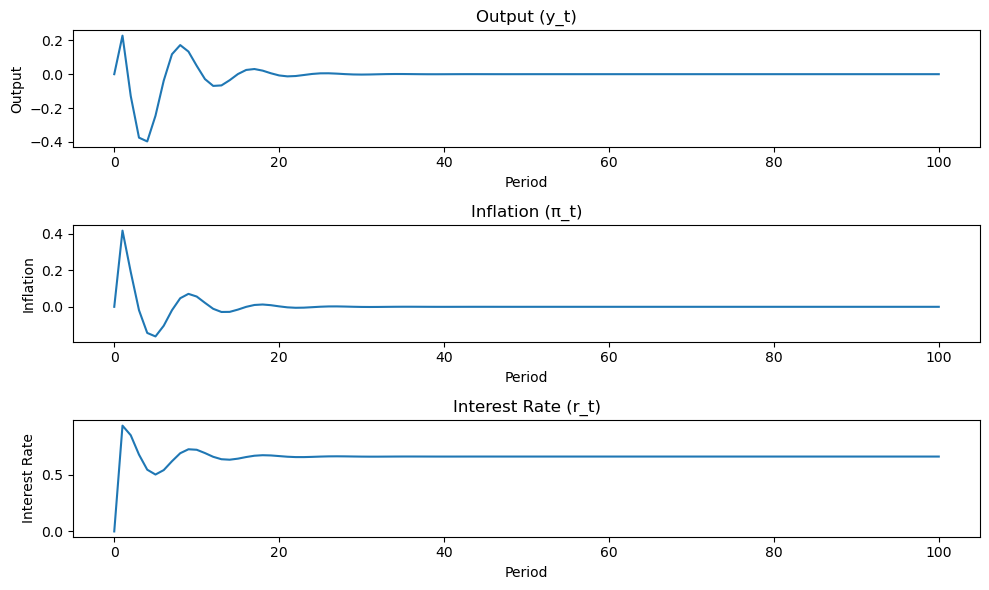

Optimal values:
Exp_y_t1: 0.32698473454219756
Exp_r_t: 0.735243786811864
Exp_pi_t1: 0.610607097923002
sigma: 0.7638707782341321
rho: 0.6593345132625752
kappa: 0.3351455451896026
beta: 0.5601533588416543
phi_y: 0.2946023646250788
phi_pi: 0.28832123649374375


In [20]:

# Define the model equations
def y_t(Exp_y_t1, sigma, Exp_r_t, rho):
    return Exp_y_t1 - (1/sigma)*(Exp_r_t - rho)

def pi_t(kappa, y_t, beta, Exp_pi_t1):
    return kappa * y_t + beta * Exp_pi_t1

def r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1):
    return rho + phi_y * Exp_y_t1 + phi_pi * Exp_pi_t1

# Simulation function
def simulate_model(params):
    Exp_y_t1, Exp_r_t, Exp_pi_t1, sigma, rho, kappa, beta, phi_y, phi_pi = params
    periods = 100  # Assuming a fixed number of periods for simulation
    y_t_values = [0]  # Initial output assumed to be 0
    pi_t_values = [0]  # Initial inflation assumed to be 0
    r_t_values = [0]  # Initial interest rate assumed to be 0
    for _ in range(periods):
        yt = y_t(Exp_y_t1, sigma, Exp_r_t, rho)
        pi_t1 = pi_t(kappa, yt, beta, Exp_pi_t1)
        rt1 = r_t(rho, phi_y, phi_pi, Exp_y_t1, Exp_pi_t1)
        y_t_values.append(yt)
        pi_t_values.append(pi_t1)
        r_t_values.append(rt1)
        Exp_y_t1, Exp_r_t, Exp_pi_t1 = yt, rt1, pi_t1
    return y_t_values, pi_t_values, r_t_values

# Define the objective function to minimize the sum of squared errors
def objective_function(params):
    simulated_y, simulated_pi, simulated_r = simulate_model(params)
    # Random target values for demonstration
    target_y = np.random.rand(len(simulated_y))
    target_pi = np.random.rand(len(simulated_pi))
    target_r = np.random.rand(len(simulated_r))
    # Calculate sum of squared errors
    error_y = np.sum((simulated_y - target_y) ** 2)
    error_pi = np.sum((simulated_pi - target_pi) ** 2)
    error_r = np.sum((simulated_r - target_r) ** 2)
    return error_y + error_pi + error_r

# Define initial guesses for the parameters
initial_guess = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]  # You may need to provide reasonable initial guesses

# Perform optimization to find optimal values
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

# Get the optimal values
optimal_values = result.x

# Simulate the model with optimal values
simulated_y, simulated_pi, simulated_r = simulate_model(optimal_values)

# Plot the simulated values
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(simulated_y)
plt.title('Output (y_t)')
plt.xlabel('Period')
plt.ylabel('Output')

plt.subplot(3, 1, 2)
plt.plot(simulated_pi)
plt.title('Inflation (π_t)')
plt.xlabel('Period')
plt.ylabel('Inflation')

plt.subplot(3, 1, 3)
plt.plot(simulated_r)
plt.title('Interest Rate (r_t)')
plt.xlabel('Period')
plt.ylabel('Interest Rate')

plt.tight_layout()
plt.show()

# Print the optimal values with variable names
variable_names = ["Exp_y_t1", "Exp_r_t", "Exp_pi_t1", "sigma", "rho", "kappa", "beta", "phi_y", "phi_pi"]
print("Optimal values:")
for name, value in zip(variable_names, optimal_values):
    print(name + ":", value)


## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 


IS Curve:
$$
y_t = E_t[y_{t+1}] - 1/σ * (E_t[r_t] - ρ) + u_{IS}
$$
Phillips Curve:
$$
π_t = κy_t + βE_t[π_{t+1}] + u_{CP}
$$
Taylor Rule:
$$
r_t = ρ + ϕ_yE_t[y_{t+1}] + ϕ_πE_t[π_{t+1}] + u_{MP}
$$

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 